Welcome to our project, where we focus on analyzing a dataset where students rated various aspects of their lives on a scale of 1 to 30. Our study centers on their reported experiences related to stress and factors that may influence its level.

The dataset we're analyzing contains rich information on different stress factors among students, selected based on five main areas: psychological, physiological, social, environmental, and academic. It includes data on anxiety levels, mental health, living conditions, teacher relationships, and more.

Our project aims not only to understand how various factors influence student stress levels but also to develop practical insights and support strategies to alleviate stress. Through in-depth analysis, we seek to identify key areas for promoting mental health and well-being among students.

Below, we're importing the necessary libraries for data analysis: pandas, numpy, seaborn, and pyplot.

1. **pandas**: pandas is a powerful Python library for data manipulation and analysis. It offers data structures like DataFrame and Series, along with a wide range of functions for reading, writing, and processing data.

2. **numpy**: numpy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

3. **seaborn**: seaborn is a statistical data visualization library built on top of matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics, making it easy to explore and understand complex datasets.

4. **pyplot**: pyplot is a module in the matplotlib library, providing a MATLAB-like plotting framework. It offers a simple interface for creating various types of plots and customizing their appearance, making it suitable for both exploratory data analysis and presentation-quality visualizations.

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

Exploratory Data Analysis

Loading data 

In [3]:
df = pd.read_csv('StressLevelDataset.csv')


df = df.drop_duplicates()

basic_stats = df.describe()
basic_stats = basic_stats.round(2)

missing_values = df.isnull().sum()


shape = df.shape


print('As we can see in this dataset we dont have any missing values (printing variable info).')
print(f'Our dataset has {shape[0]} rows and {shape[1]} columns.')
print(f'Basic statistics of our dataset are: {basic_stats}.')

As we can see in this dataset we dont have any missing values (printing variable info).
Our dataset has 1100 rows and 21 columns.
Basic statistics of our dataset are:        anxiety_level  self_esteem  mental_health_history  depression  \
count        1100.00      1100.00                1100.00     1100.00   
mean           11.06        17.78                   0.49       12.56   
std             6.12         8.94                   0.50        7.73   
min             0.00         0.00                   0.00        0.00   
25%             6.00        11.00                   0.00        6.00   
50%            11.00        19.00                   0.00       12.00   
75%            16.00        26.00                   1.00       19.00   
max            21.00        30.00                   1.00       27.00   

       headache  blood_pressure  sleep_quality  breathing_problem  \
count   1100.00         1100.00        1100.00            1100.00   
mean       2.51            2.18           2.66

In [4]:
social_factors = df[['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']]
psychological_factors = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']]
health_factors = df[['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']]
environmental_factors = df[['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']]
academic_factors = df[['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']]


After dividing variables on category no we are going to check distribution of values in every field.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16996\2460991371.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


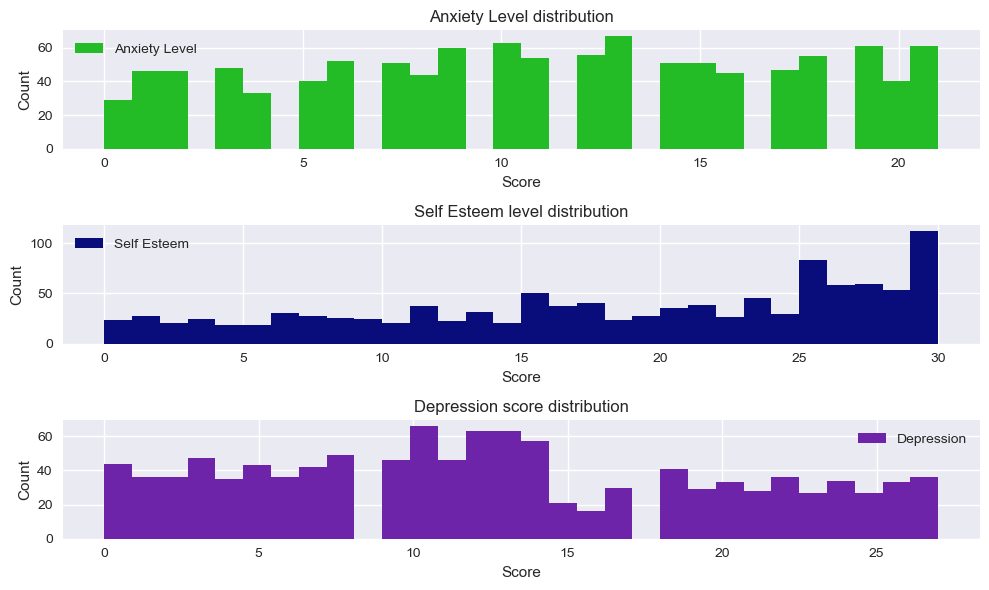

In [5]:
plt.style.use('seaborn')

fig, axes = plt.subplots(3, 1, figsize=(10, 6))
bins = 30


axes[0].hist(psychological_factors['anxiety_level'],bins= bins ,label='Anxiety Level ', color = '#24BC26')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Count')
axes[0].set_title('Anxiety Level distribution')

axes[1].hist(psychological_factors['self_esteem'], bins=bins, label='Self Esteem', color = '#090D7B')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Count')
axes[1].set_title('Self Esteem level distribution')

axes[2].hist(psychological_factors['depression'], bins=bins, label='Depression', color = '#6D24A8')

axes[2].set_xlabel('Score')
axes[2].set_ylabel('Count')
axes[2].set_title('Depression score distribution')


axes[0].legend()
axes[1].legend()
axes[2].legend()



axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)
  
fig.tight_layout()
plt.show()


Rozkłady zmiennych prezentują się następująco


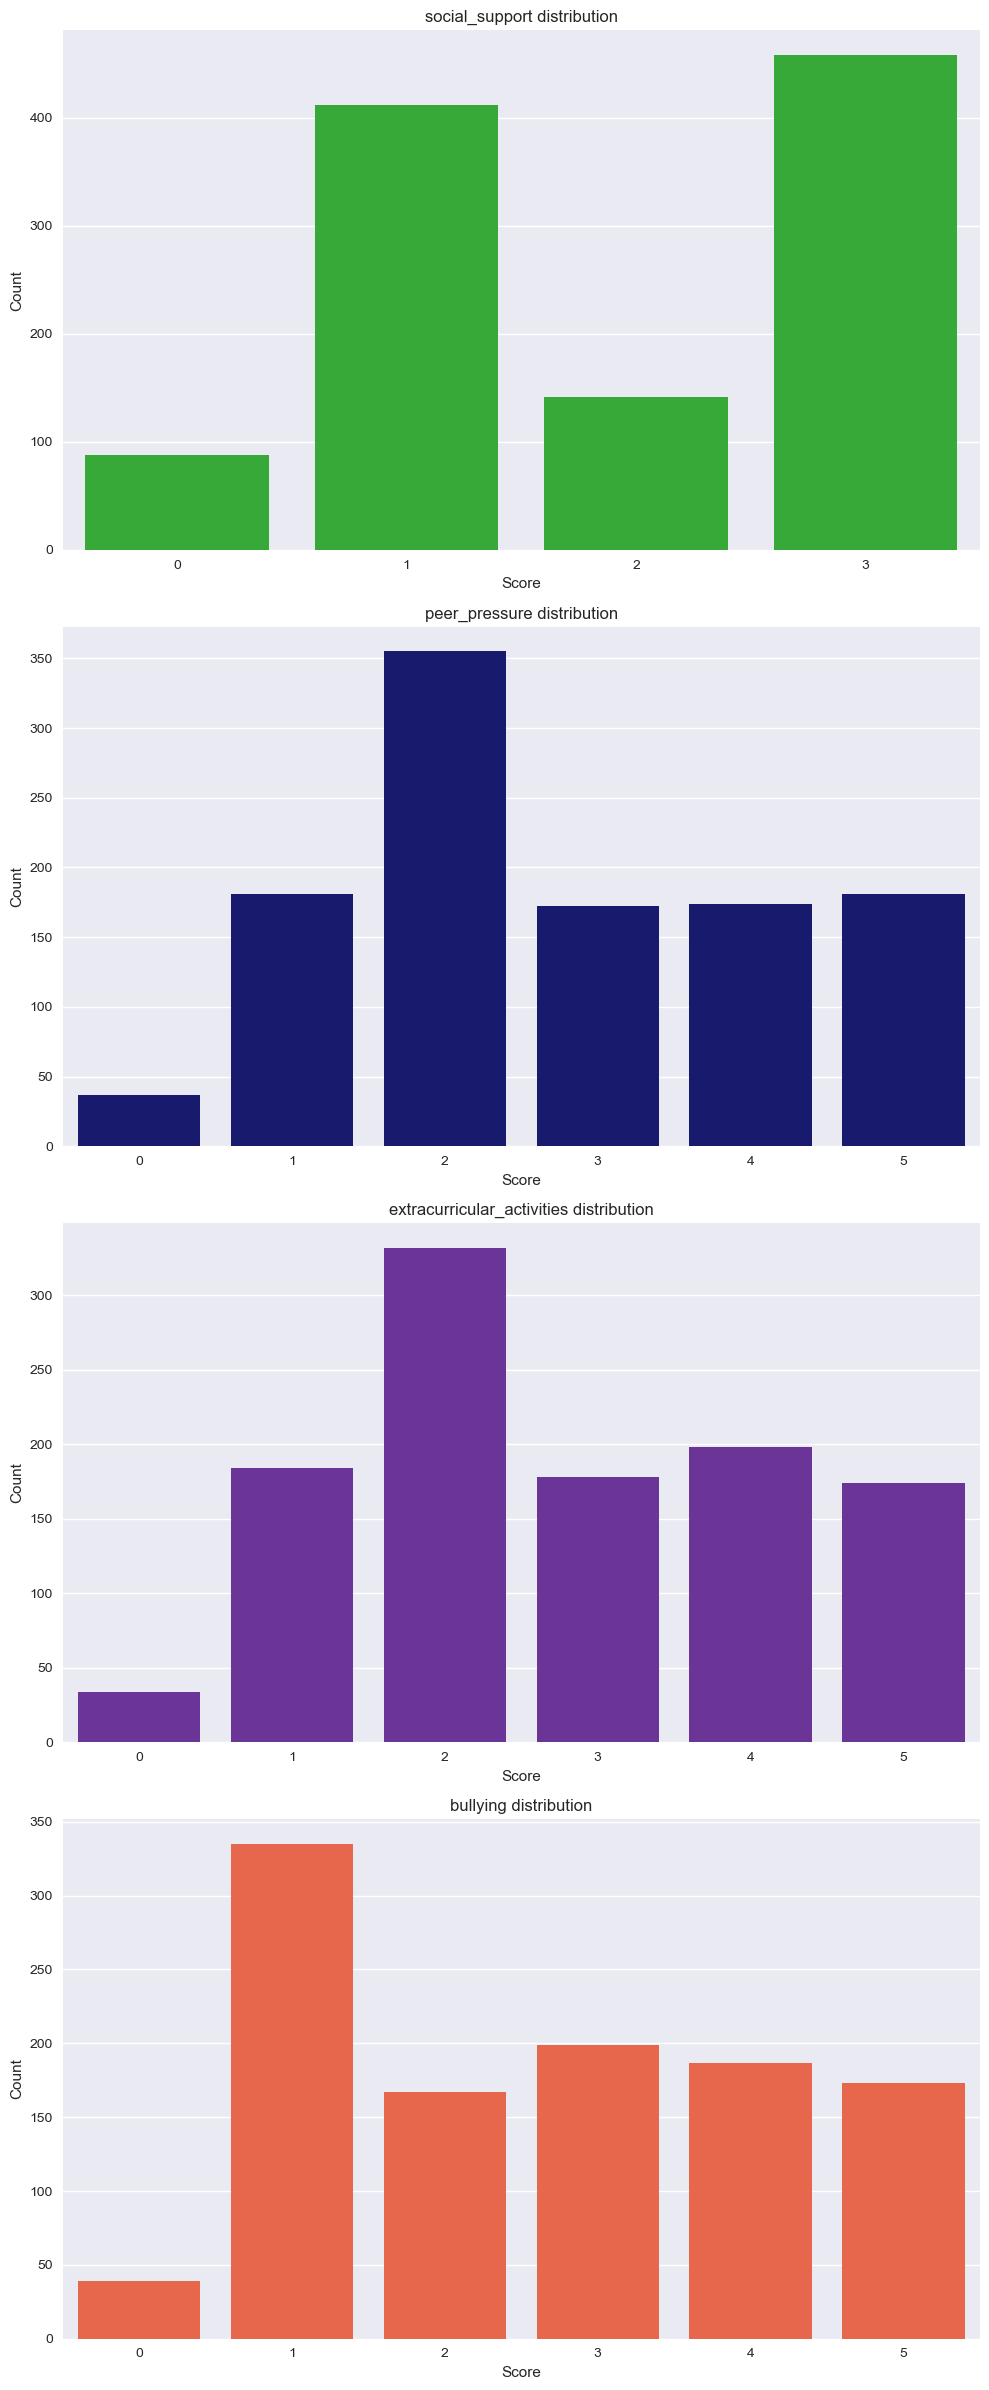

In [11]:
fig, axes = plt.subplots(len(social_factors.columns), 1, figsize=(10, 6*len(social_factors.columns)))
color_dict = {'social_support': '#24BC26', 'peer_pressure': '#090D7B', 'extracurricular_activities': '#6D24A8', 'bullying': '#FF5733'}
for i, column in enumerate(social_factors.columns):
    color = color_dict.get(column, '#24BC26') 
    sns.countplot(x=social_factors[column], ax=axes[i], color=color)
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{column} distribution')

fig.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16996\3940703631.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_maps[i % len(color_maps)])  # Use different color map for each pie chart


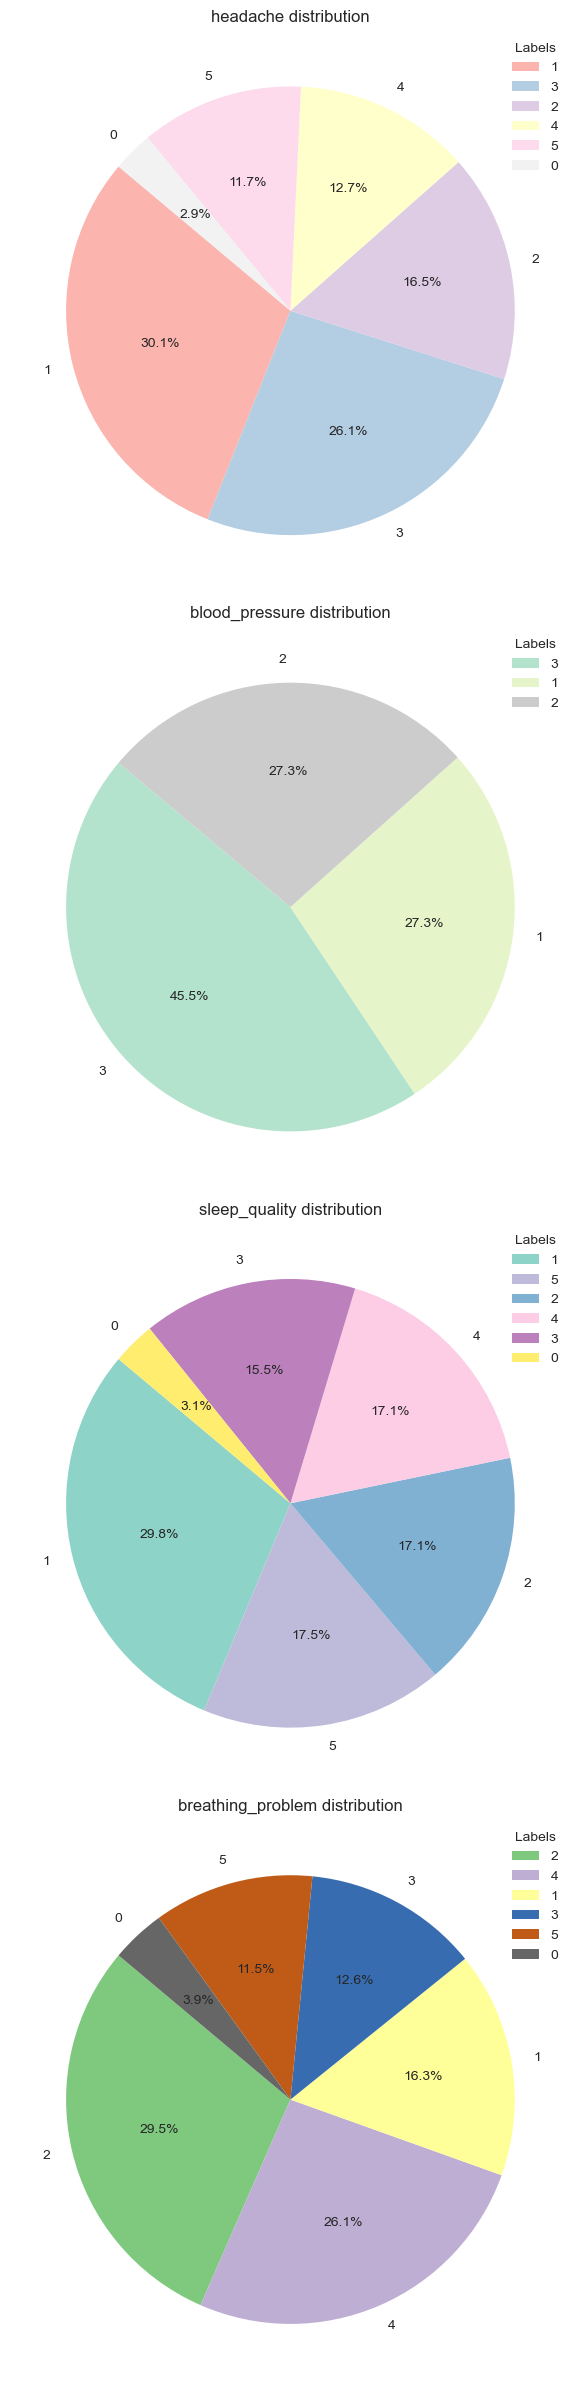

In [7]:
import matplotlib.cm as cm

fig, axes = plt.subplots(len(health_factors.columns), 1, figsize=(10, 6*len(health_factors.columns)))

color_maps = ['Pastel1', 'Pastel2', 'Set3', 'Accent']  # Add more color maps if needed

for i, column in enumerate(health_factors.columns):
    counts = health_factors[column].value_counts()
    cmap = cm.get_cmap(color_maps[i % len(color_maps)])  # Use different color map for each pie chart
    colors = cmap(np.linspace(0, 1, len(counts)))  # Generate colors from color map
    axes[i].pie(counts, labels = counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].set_title(f'{column} distribution')
    axes[i].legend(title="Labels")  # Add this line to add labels to the chart

fig.tight_layout()
plt.show()


Macierz korelacji dla naszych zmiennych

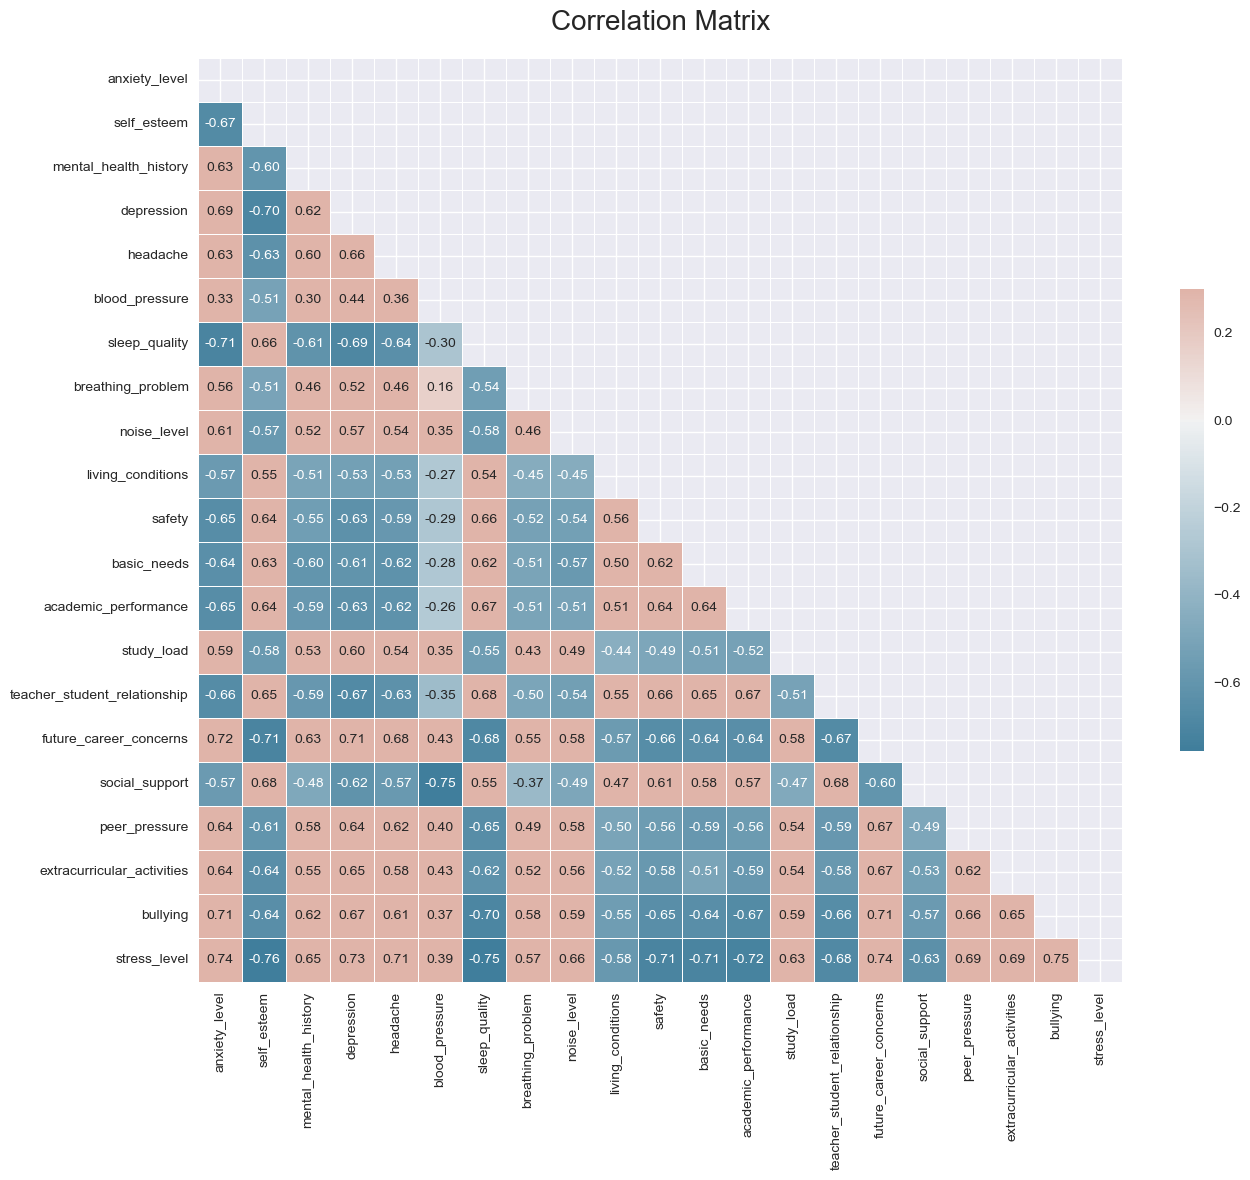

In [8]:


matrix_correlation = df.corr()
mask = np.triu(np.ones_like(matrix_correlation, dtype=bool))


f, ax = plt.subplots(figsize=(15, 12))  


cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(matrix_correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"size": 10})


plt.title('Correlation Matrix', fontsize=20, pad=20)

plt.show()

